# Problem Set 2

## Q1 Simulation in Sociology

### a) Validity Issues

#### Multi-Agent Systems
They describe macroscopic properties of a system as emergent only as a result of several microscopic individual-level interactions. In this sense, macroscopic properties are perceived exclusively as 'emergent'. This clashes with the beliefs ofthe macro approach, whose proponents contest that we can explain social phenomena only by analyzing the global structure of a social system. The validity of the macro-construct resulting from a multagent system may this be called into question. 

#### Cellular Automata

These involve 2 primary weaknesses with regard to 'validity':
i) Synchronous Updating of States: This model assumes a 'global clock' according to which all cells/individuals in the system are updated simultaneously. This assumption may is not representative of real social processes, where individuals modify their attitudes and opinions at different moments.
ii) Unrealistic Restrictions on Spatial Interaction: This model also requires that each individual only interact with a subset of the entire population. Prima facie, this may seem like a justified restriction as even in the real world, it is impossible for an individual to interact with all other individuals. However, the specific limits of the 'neighnourhood' within which individual may interact with other individuals eludes precise definition and is likely to change in location over time. Moreover, mass media and other technology may facilitate interaction between individuals who are not geographically close to each other


### b) Dynamic Feedback

The author speaks of dynamic feedback and cites the example of using multiagent systems to define models of behaviour such as the description of the concept of social roles.

In the realm of political science, an example of a system that may display such dynamic behaviour would be potential research question that may be addressed would be the funding of election campaigns by private donations. For example, to what extent has funding of election campaigns by individuals hailing from a specific industry increased the probability of the funded candidate in winning the local or state elections? The dynamism emerges from the fact that once elected, the industrialist may himself or herself build up financial resources during the elected candidate's term- by means of lobbying or graft at the behest of the candidate. This in turns helps them continue to fund the same candidate in the next election. 

## Q2 Simulation in Action

In [125]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


In [126]:
def inc_err(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    return errors


In [135]:
def inc_sim(profile):

    #set random seed
    np.random.seed(333)

    #create a matrix of lognormally distributed errors, all of the same dimension as number of years* number of simulations
    errors = np.random.lognormal(0, p['stddev'] ,(p['lf_years'], p['num_draws']))
    
    #define the initial term
    base= np.log(p['inc'])
    
    #create an initial matrix of dim (lf_years, num_draws) (same as that of errors)
    ln_inc_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the first row of the matrix with simulations for the first year
    ln_inc_mat[0, :] = base + np.log(errors[0, :])

    #loop and apply model to the remaining rows
    for t in range(1, p['lf_years']):
        ln_inc_mat[t, :] = (1-p['rho'])*(base+ (p['g']*t))+p['rho']*ln_inc_mat[t - 1, :]+np.log(errors[t, : ])

    
    return np.exp(ln_inc_mat) #We are interested in the original income values, not the natural logarithm thereof



In [128]:
p = {   'inc'         : 80000,      #starting income
        'stddev'      : 0.13,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

Now let's plot take a birds-eye view of these values to see if they roughly fall within the range we expect to see. 

In [141]:
inc_mat=inc_sim(p)
print(inc_mat)


[[100009.04107949  83449.09187628  75213.89535546 ...  73566.01299991
  108099.14463559  86324.18192173]
 [ 83110.46670807  80857.11947497  81032.72145156 ...  90654.63934942
  108818.70000602  84133.5188448 ]
 [106803.77280353 102205.05149742  63397.52577315 ...  78120.97964893
   76257.51851361  79799.07879356]
 ...
 [180261.73762745 190705.96275929 171530.00102814 ... 205146.34277722
  230987.97596881 230159.29551772]
 [178669.9074883  165721.69137842 188442.74088338 ... 198304.70672764
  231855.14975461 229584.96083259]
 [231051.0387498  181337.29281349 177081.8538588  ... 154814.63116532
  219282.76153815 198695.20554107]]


Great, we do expect to start around the $80,000 mark. The final results (in 2059) seem to match with our intuition too. 

#### Plotting of Individual Line
We randomly select one of the 10,000 simulated instances (here, ID 540) to plot over the period 2020-2060 

Text(0,0.5,'Annual Salary(\\$s)')

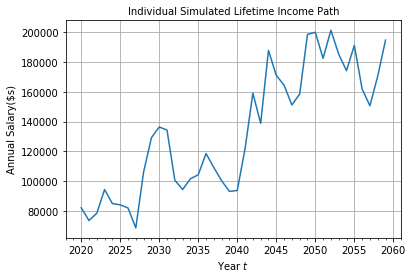

In [142]:
%matplotlib inline
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 540
fig, ax = plt.subplots()
plt.plot(year_vec, inc_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Simulated Lifetime Income Path', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Salary(\$s)')

### b) Distribution of Simulated Income 

First, we plot a histogram of the income based on values simulated in part a)

Text(0.5,1,'Number of Respondents in Salary Bins')

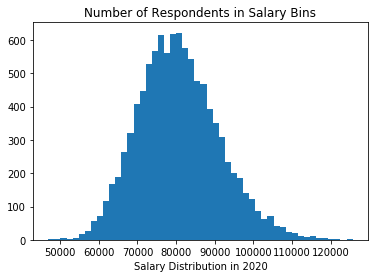

In [143]:
plt.hist(inc_mat[0,:], bins=50)
plt.xlabel("Salary Distribution in 2020")
plt.title("Number of Respondents in Salary Bins")

The values that we have plotted here are the exponentiated values of the results of the simulation. Since the variables in the simulation were in lognormally distributed, their exponentiation would result in normally distributed variables. 

Also, we can observe that the distribution is roughly bell-shaped and symmetric. 

So *yes, the distribution is roughly normal*. More rigorous confirmation would require additional statistical tests. 

Using the properties of the normal distribution, we can find out the percentage of values expected to be below a certain values

Now we find proportions of users above or below specific values

In [163]:
prop1=((inc_mat[0]>100000).sum())/100
print(str(prop1)+"% of simulations feature an income of more than 100000 in the first year")
prop2=((inc_mat[0]<70000).sum())/100
print(str(prop2)+"% of simulations feature an income of less than 70000 in the first year")


4.19% of simulations feature an income of more than 100000 in the first year
15.01% of simulations feature an income of less than 70000 in the first year


### c) Debt PayOff

Here, we need to calculate a new vector which provides integer values of the years needed to pay off debts. 


In [145]:
def check_debt(column, debt):
    paid_year=0
    for i in range(len(column)):
        debt-= 0.1*column[i]
        if debt>0:
            continue
        else:
            paid_year= i+1
            break
    return paid_year


[11 11 12 ... 12 11 12]


Text(0.5,1,'Number of Simulations')

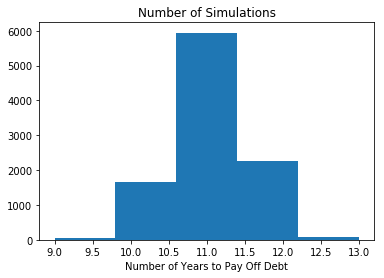

In [151]:
paid_years=[]
for row in np.transpose(inc_mat):
    paid_years.append(check_debt(row, 95000))
paid= np.array(paid_years)
    
plt.hist(paid, bins=5)
plt.xlabel("Number of Years to Pay Off Debt")
plt.title("Number of Simulations")


In [79]:
loan=95000
payoff_years=np.zeros((1,p['num_draws']))
print(payoff_years)
print(payoff_years.shape[1])

for i in range(payoff_years.shape[1]):
    payoff_years[0, i]=np.transpose(inc_mat)


    

[[0. 0. 0. ... 0. 0. 0.]]
10000
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


### Part d) Changes in Initial Income and Variability

In [119]:
p_new = {'inc'         : 90000,      #starting income
        'stddev'      : 0.17,       #standard deviation
        'rho'         : 0.4,        #persist rate
        'g'           : 0.025,      #growth rate
        'st_year'     : int(2020),  #start year
        'lf_years'    : 40,         #years to live        
        'num_draws'   : 10000       #simulations
    }
    

In [120]:
new_inc_mat= inc_sim(p_new)


Text(0.5,1,'Number of Respondents in Salary Bins')

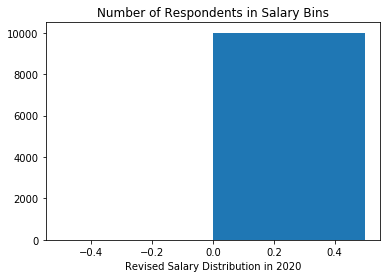

In [121]:
paid_years_new=[]
for row in np.transpose(new_inc_mat):
    paid_years_new.append(check_debt(row, 95000))
paid= np.array(paid_years_new)
    
plt.hist(paid, bins=2)
plt.xlabel("Revised Salary Distribution in 2020")
plt.title("Number of Respondents in Salary Bins")